In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/train.csv', parse_dates=True)
test = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/test.csv', parse_dates=True)
sub = pd.read_csv('/Users/arijitchandra/Downloads/LTFS/sample_sub.csv')

In [2]:
print(train.shape)
print(test.shape)
print(sub.shape)

(80402, 6)
(180, 3)
(180, 4)


In [3]:
%%time
from datetime import datetime
train['application_date']=[datetime.strptime(train.application_date[i],'%d/%m/%y') for i in range(len(train))]
test['application_date']=[datetime.strptime(test.application_date[i],'%d/%m/%y') for i in range(len(test))]

CPU times: user 2.77 s, sys: 9.67 ms, total: 2.78 s
Wall time: 2.78 s


In [4]:
train_s1 = train[train['segment']==1]
train_s2 = train[train['segment']==2]

In [5]:
train_s1.set_index('application_date', inplace=True)
train_s2.set_index('application_date', inplace=True)

train_s1.index, train_s2.index

(DatetimeIndex(['2017-04-01', '2017-04-03', '2017-04-04', '2017-04-05',
                '2017-04-07', '2017-04-12', '2017-04-13', '2017-04-14',
                '2017-04-15', '2017-04-16',
                ...
                '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
                '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
                '2019-07-04', '2019-07-05'],
               dtype='datetime64[ns]', name='application_date', length=66898, freq=None),
 DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
                '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
                '2017-04-09', '2017-04-10',
                ...
                '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17',
                '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
                '2019-07-22', '2019-07-23'],
               dtype='datetime64[ns]', name='application_date', length=13504, freq=None))

In [6]:
train_s1 = train_s1.groupby(['application_date']).sum()

train_s2 = train_s2.groupby(['application_date']).sum()

In [7]:
cols_to_remove=['branch_id','segment']
train_s1.drop(cols_to_remove, axis=1, inplace=True)
train_s2.drop(cols_to_remove, axis=1, inplace=True)
train_s1.shape,train_s2.shape

((806, 1), (844, 1))

In [8]:
test_s1 = test[test['segment']==1]
test_s2 = test[test['segment']==2]
test_s1.shape,test_s2.shape

((87, 3), (93, 3))

In [9]:
test_s1.set_index('application_date', inplace=True)
test_s2.set_index('application_date', inplace=True)

In [10]:
test_s1.drop('id', axis =1, inplace = True)
test_s2.drop('id', axis =1, inplace = True)
test_s1.shape, test_s2.shape

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((87, 1), (93, 1))

In [11]:
test_s1_sqrt = np.sqrt(test_s1)
test_s2_sqrt = np.sqrt(test_s2)

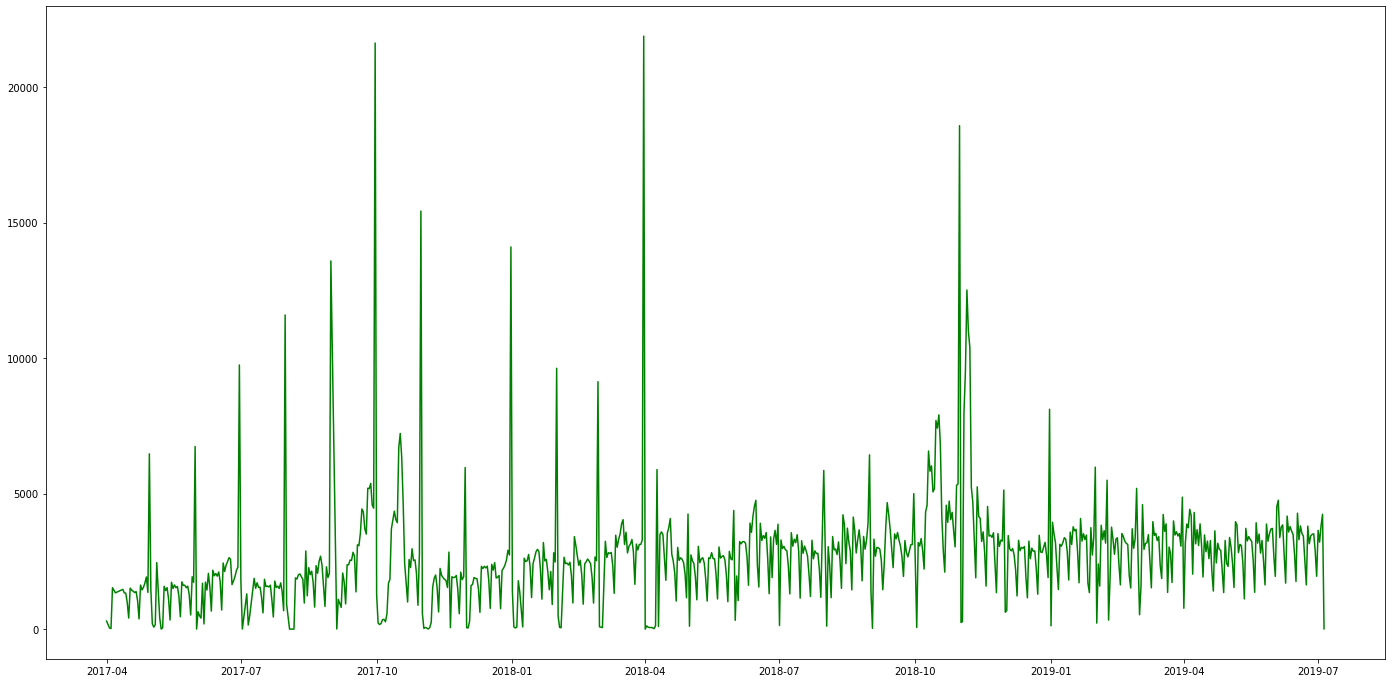

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(train_s1, color = 'green')
plt.show()

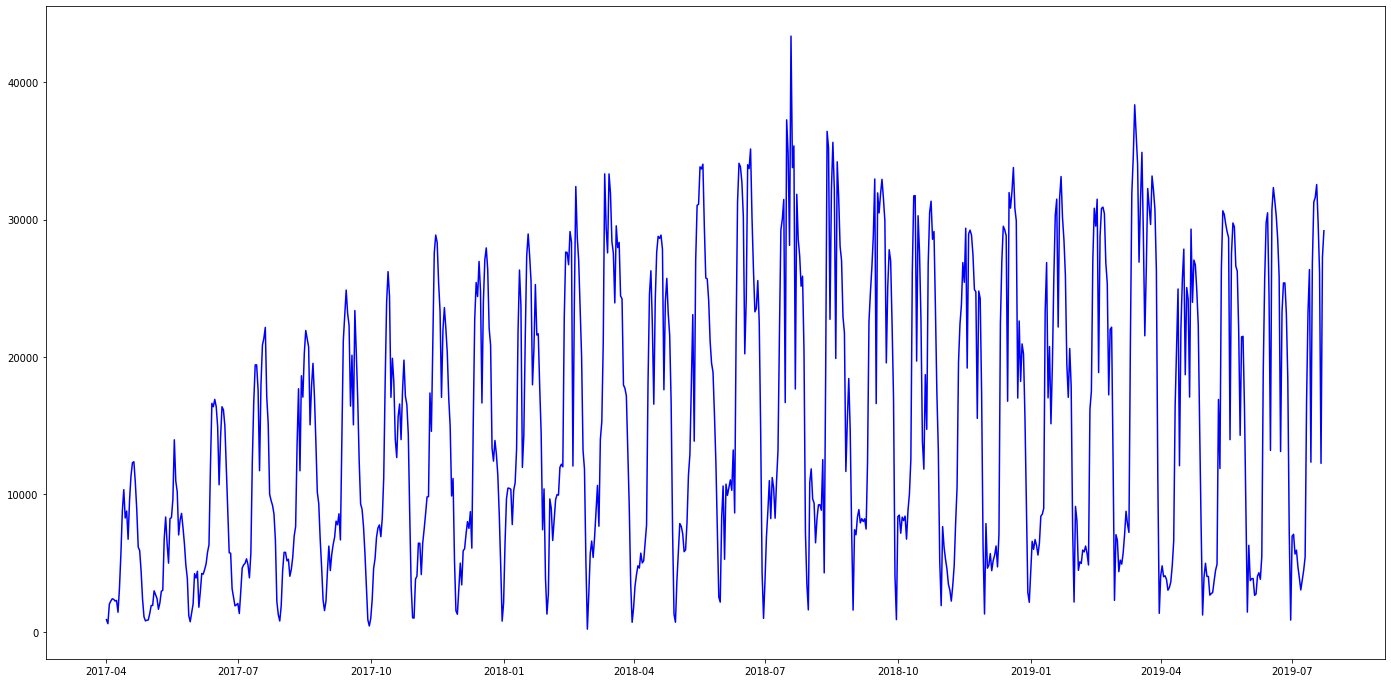

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plt.plot(train_s2, color = 'blue')
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(24,12))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries["case_count"], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

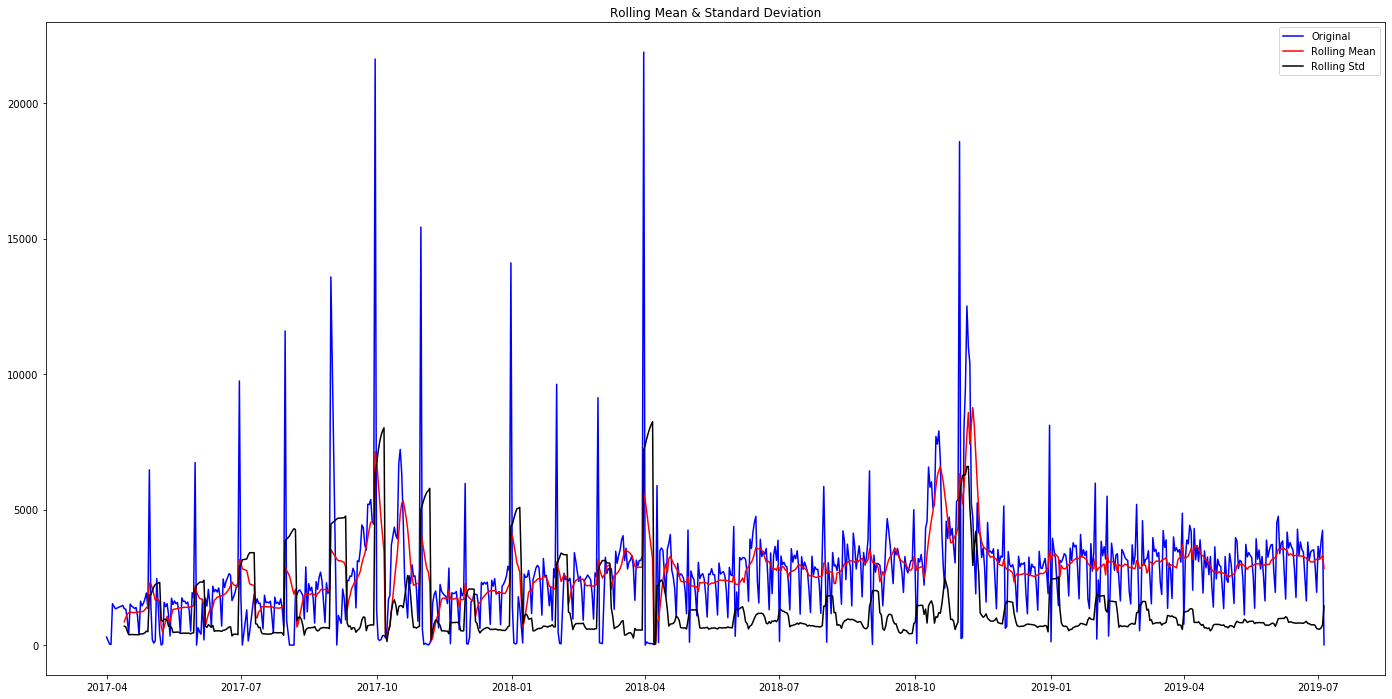

Results of Dickey-Fuller Test:
Test Statistic                  -4.550992
p-value                          0.000159
#Lags Used                      13.000000
Number of Observations Used    792.000000
Critical Value (1%)             -3.438634
Critical Value (5%)             -2.865196
Critical Value (10%)            -2.568717
dtype: float64


In [16]:
test_stationarity(train_s1)

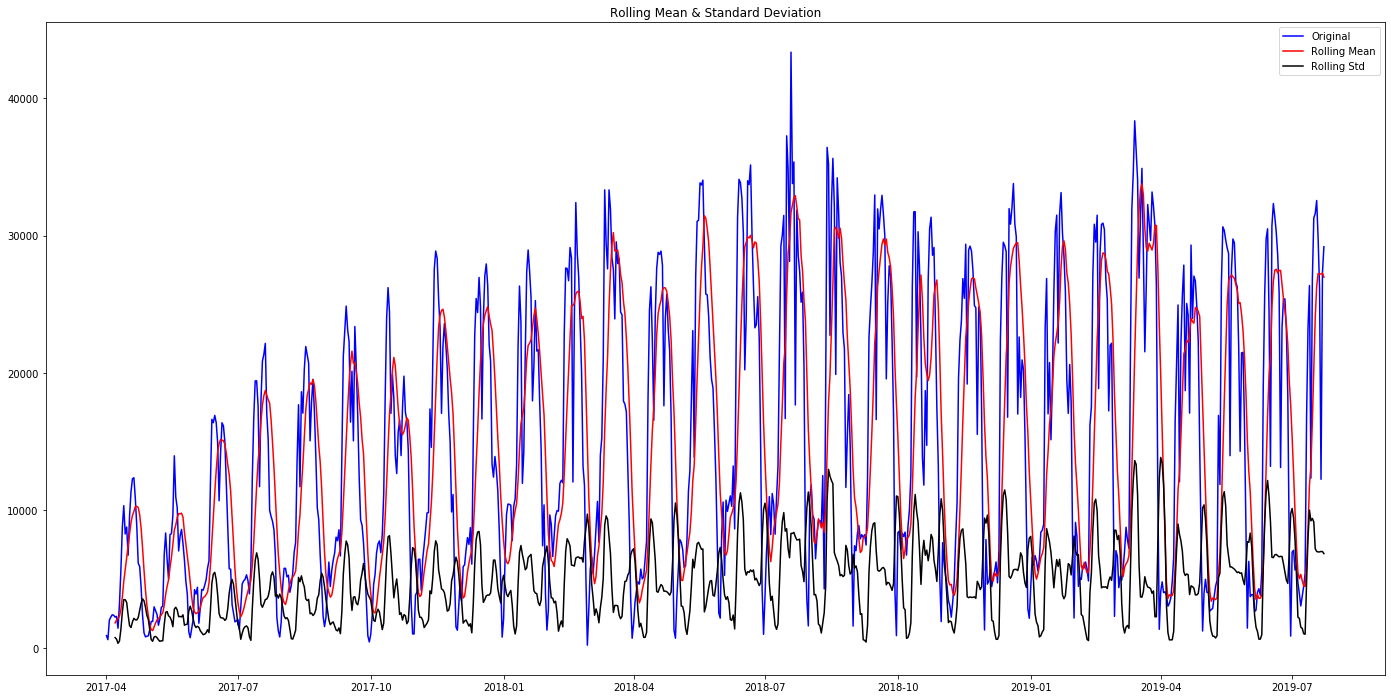

Results of Dickey-Fuller Test:
Test Statistic                  -4.359219
p-value                          0.000350
#Lags Used                      21.000000
Number of Observations Used    822.000000
Critical Value (1%)             -3.438330
Critical Value (5%)             -2.865063
Critical Value (10%)            -2.568646
dtype: float64


In [17]:
test_stationarity(train_s2)

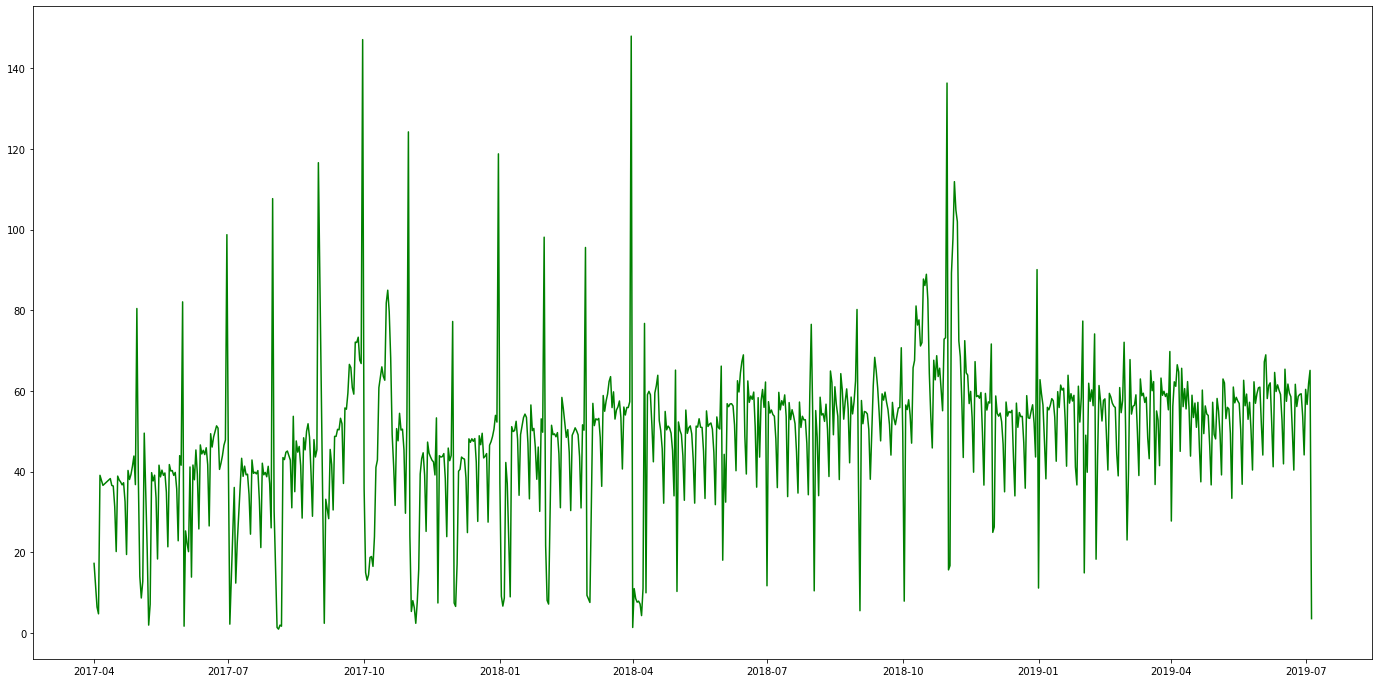

In [18]:
train_s1_sqrt = np.sqrt(train_s1)
plt.figure(figsize=(24,12))
plt.plot(train_s1_sqrt, color = 'green')

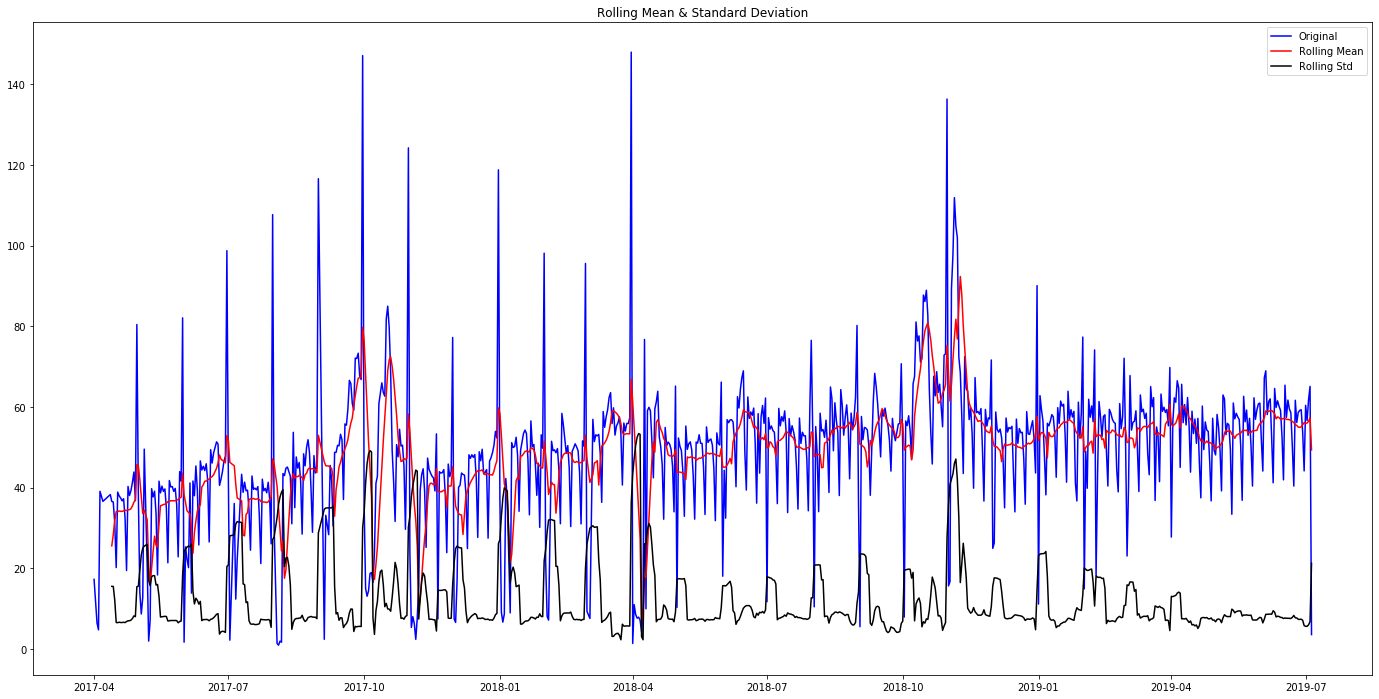

Results of Dickey-Fuller Test:
Test Statistic                  -3.408774
p-value                          0.010663
#Lags Used                      20.000000
Number of Observations Used    785.000000
Critical Value (1%)             -3.438708
Critical Value (5%)             -2.865229
Critical Value (10%)            -2.568734
dtype: float64


In [19]:
test_stationarity(train_s1_sqrt)

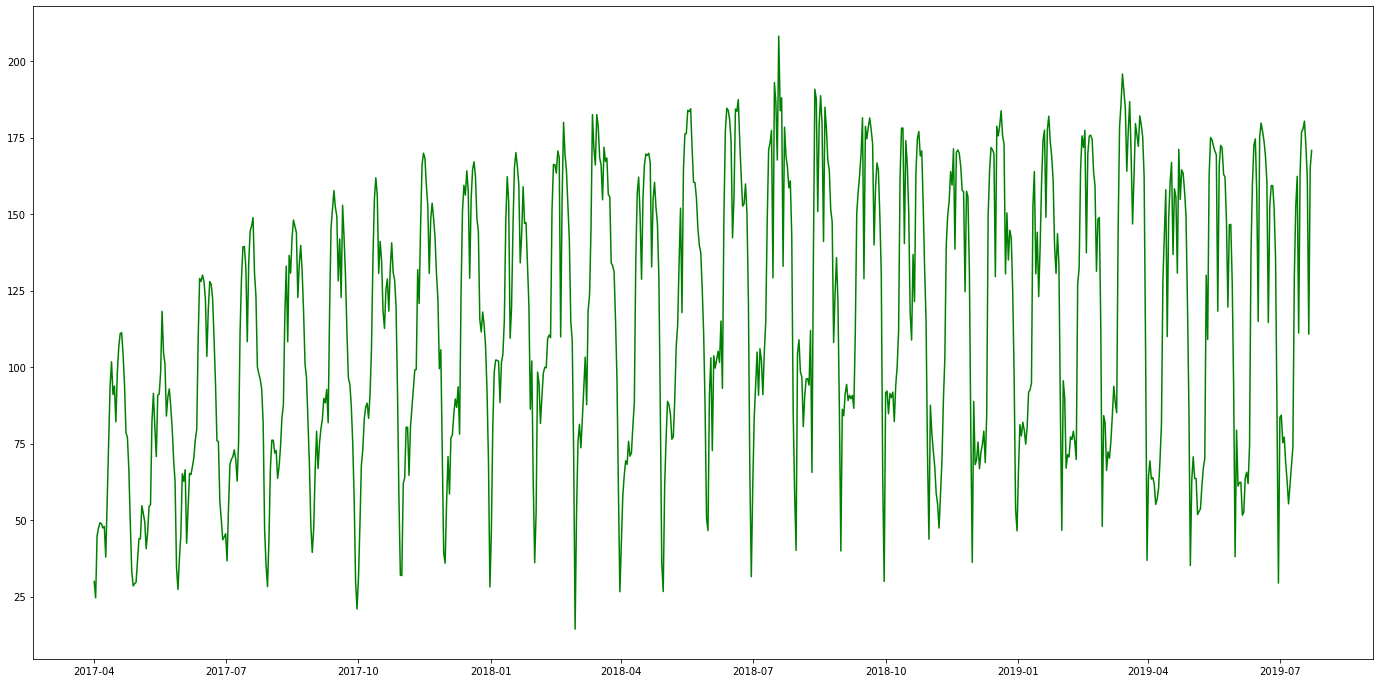

In [20]:
train_s2_sqrt = np.sqrt(train_s2)
plt.figure(figsize=(24,12))
plt.plot(train_s2_sqrt, color= 'green')

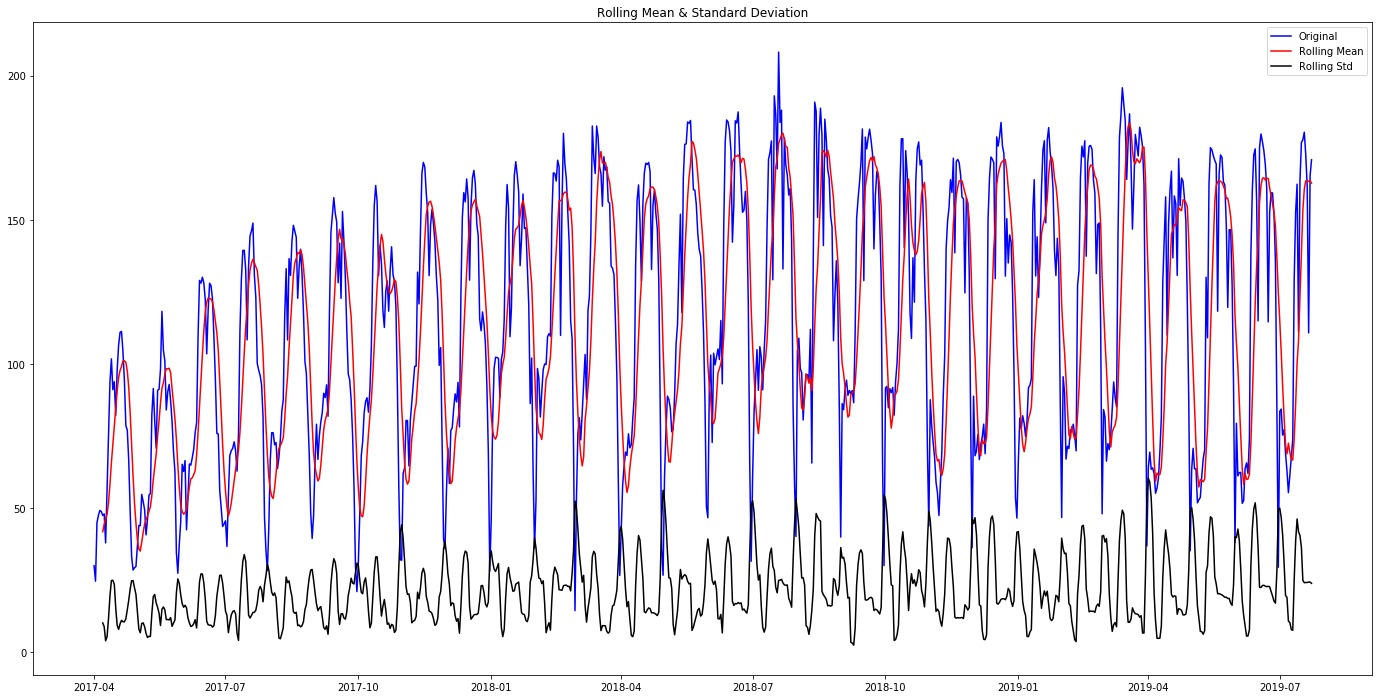

Results of Dickey-Fuller Test:
Test Statistic                  -4.582106
p-value                          0.000139
#Lags Used                      21.000000
Number of Observations Used    822.000000
Critical Value (1%)             -3.438330
Critical Value (5%)             -2.865063
Critical Value (10%)            -2.568646
dtype: float64


In [21]:
test_stationarity(train_s2_sqrt)

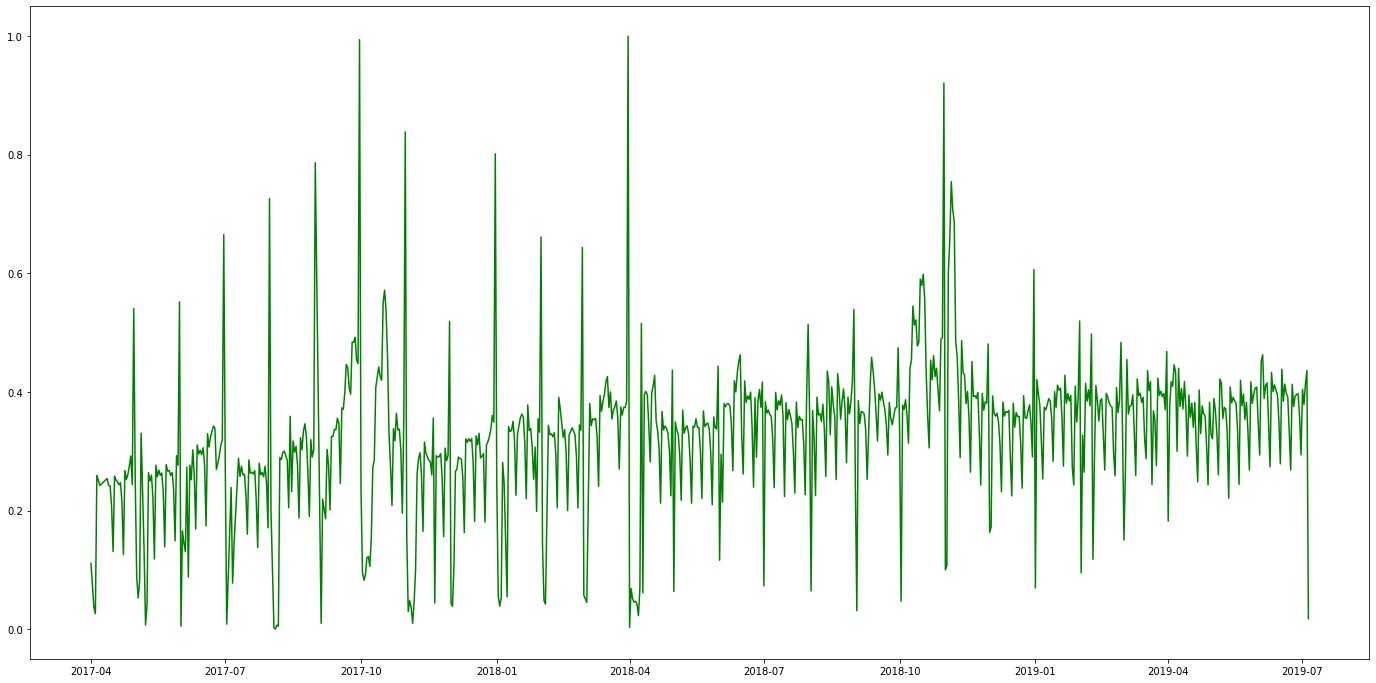

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_s1_sqrt)
train_s1_scaled = scaler.transform(train_s1_sqrt)
train_s1_scaled = pd.DataFrame(train_s1_scaled, columns=[train_s1_sqrt.columns], index=train_s1_sqrt.index)
test_s1_scaled = scaler.transform(test_s1_sqrt)
test_s1_scaled = pd.DataFrame(test_s1_scaled, columns = [test_s1_sqrt.columns], index=test_s1_sqrt.index)
plt.figure(figsize=(24,12))
plt.plot(train_s1_scaled, color = 'green')

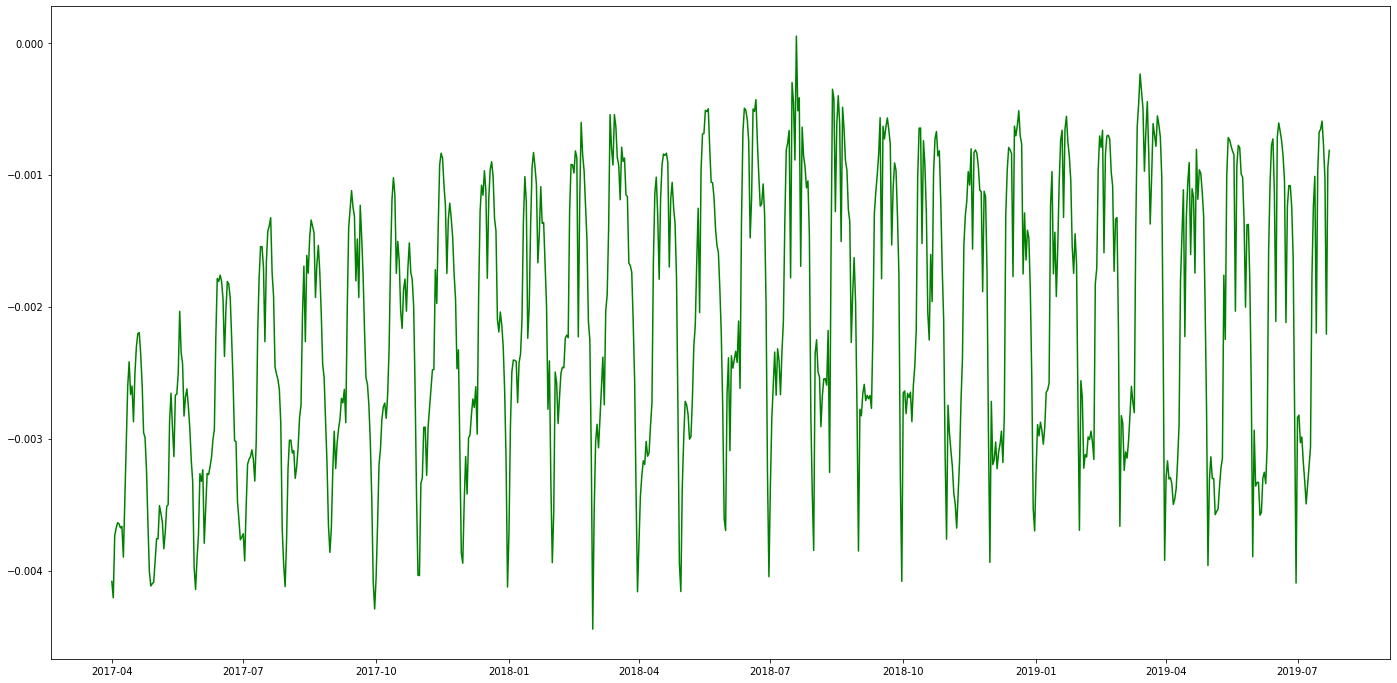

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(train_s2)
train_s2_scaled = scaler2.transform(train_s2_sqrt)
train_s2_scaled = pd.DataFrame(train_s2_scaled, columns=[train_s2_sqrt.columns], index=train_s2_sqrt.index)
test_s2_scaled = scaler2.transform(test_s2_sqrt)
test_s2_scaled = pd.DataFrame(test_s2_scaled, columns = [test_s2_sqrt.columns], index=test_s2_sqrt.index)
plt.figure(figsize=(24,12))
plt.plot(train_s2_scaled, color = 'green')

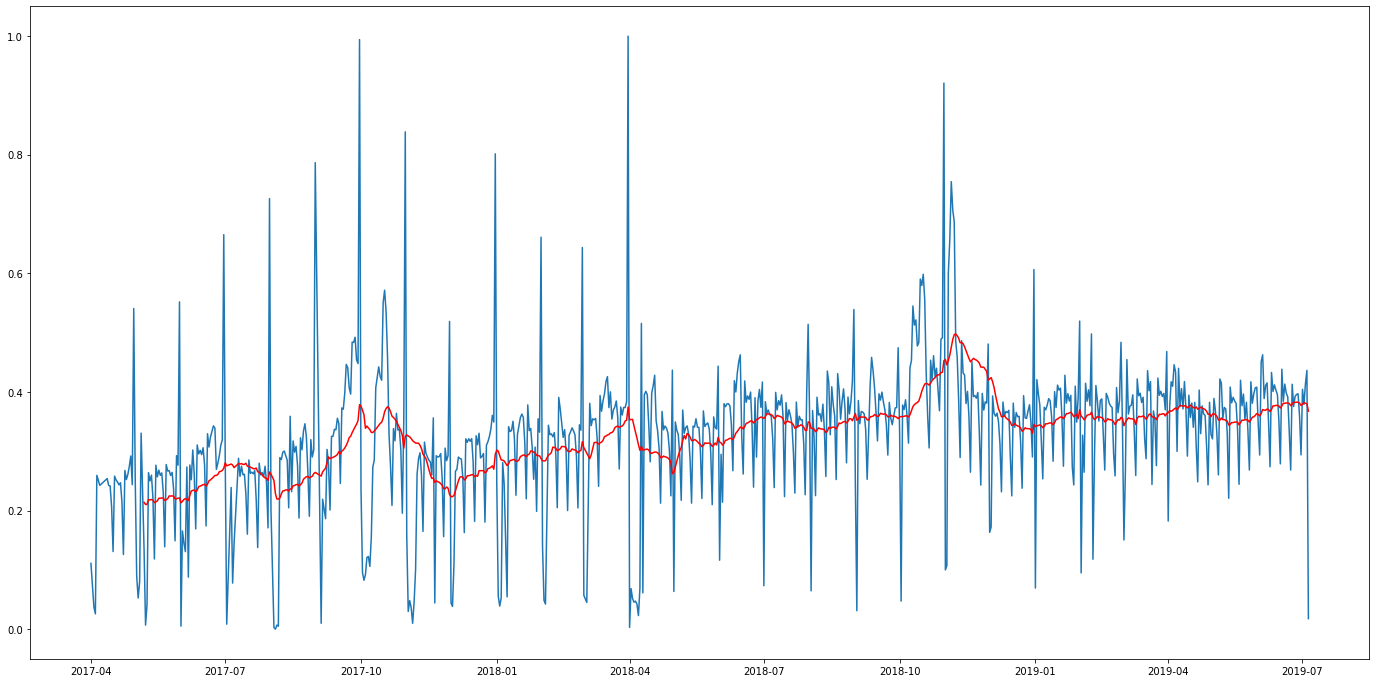

In [24]:
moving_avg_train_s1 = train_s1_scaled.rolling(30).mean()
plt.figure(figsize=(24,12))
plt.plot(train_s1_scaled)
plt.plot(moving_avg_train_s1, color='red')

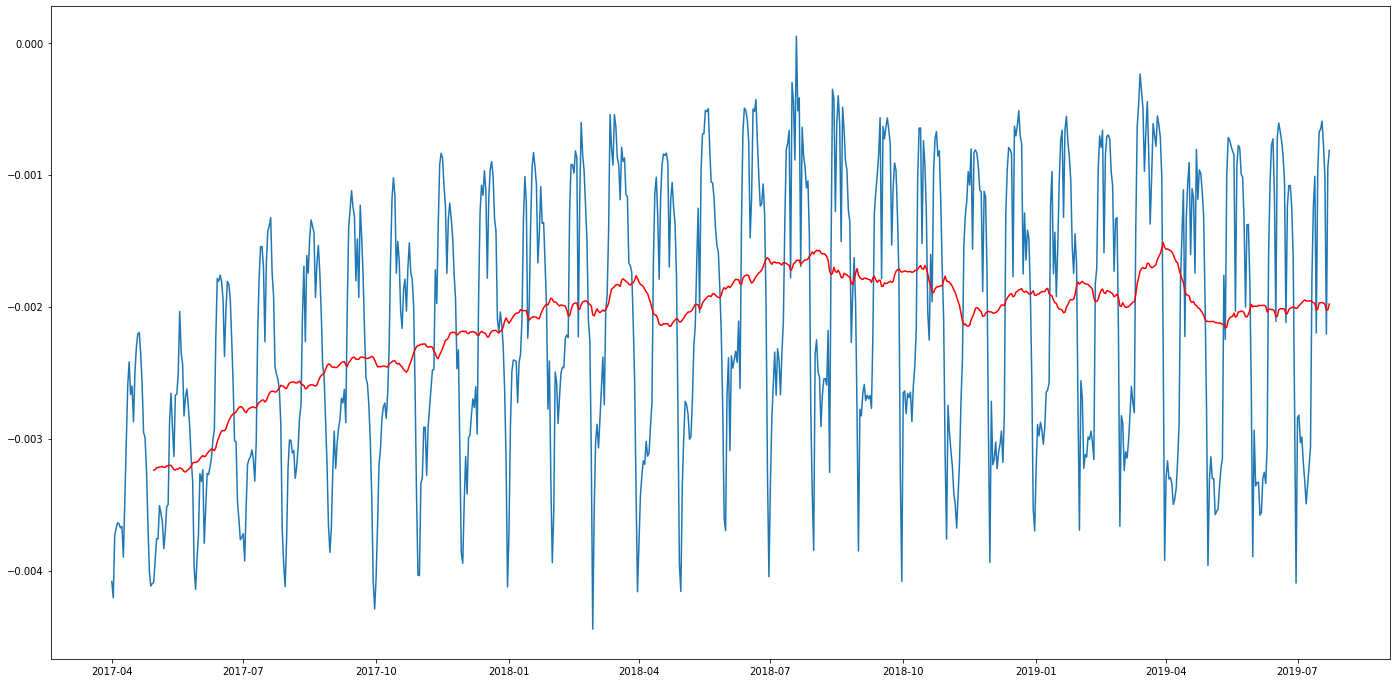

In [25]:
moving_avg_train_s2 = train_s2_scaled.rolling(30).mean()
plt.figure(figsize=(24,12))
plt.plot(train_s2_scaled)
plt.plot(moving_avg_train_s2, color='red')

In [ ]:
train_s1_moving_avg_diff = train_s1_scaled - moving_avg_train_s1
train_s1_moving_avg_diff.head(12)

In [ ]:
train_s2_moving_avg_diff = train_s2_scaled - moving_avg_train_s2
train_s2_moving_avg_diff.head(12)

In [ ]:
train_s1_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_s1_moving_avg_diff)

In [ ]:
train_s2_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_s2_moving_avg_diff)

In [ ]:
train_s1_scaled_diff = train_s1_scaled - train_s1_scaled.shift()
plt.figure(figsize=(24,12))
plt.plot(train_s1_scaled_diff)

In [ ]:
train_s1_sqrt_diff.dropna(inplace=True)
#test_stationarity(train_s1_scaled_diff)

In [ ]:
train_s2_scaled_diff = train_s2_scaled - train_s2_scaled.shift()
plt.figure(figsize=(36,12))
plt.plot(train_s2_scaled_diff)

In [ ]:
train_s2_scaled_diff.dropna(inplace=True)
#test_stationarity(train_s2_scaled_diff)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_s1 = seasonal_decompose(train_s1_scaled, freq=30)
trend_s1 = decomposition_s1.trend
seasonal_s1 = decomposition_s1.seasonal
residual_s1 = decomposition_s1.resid

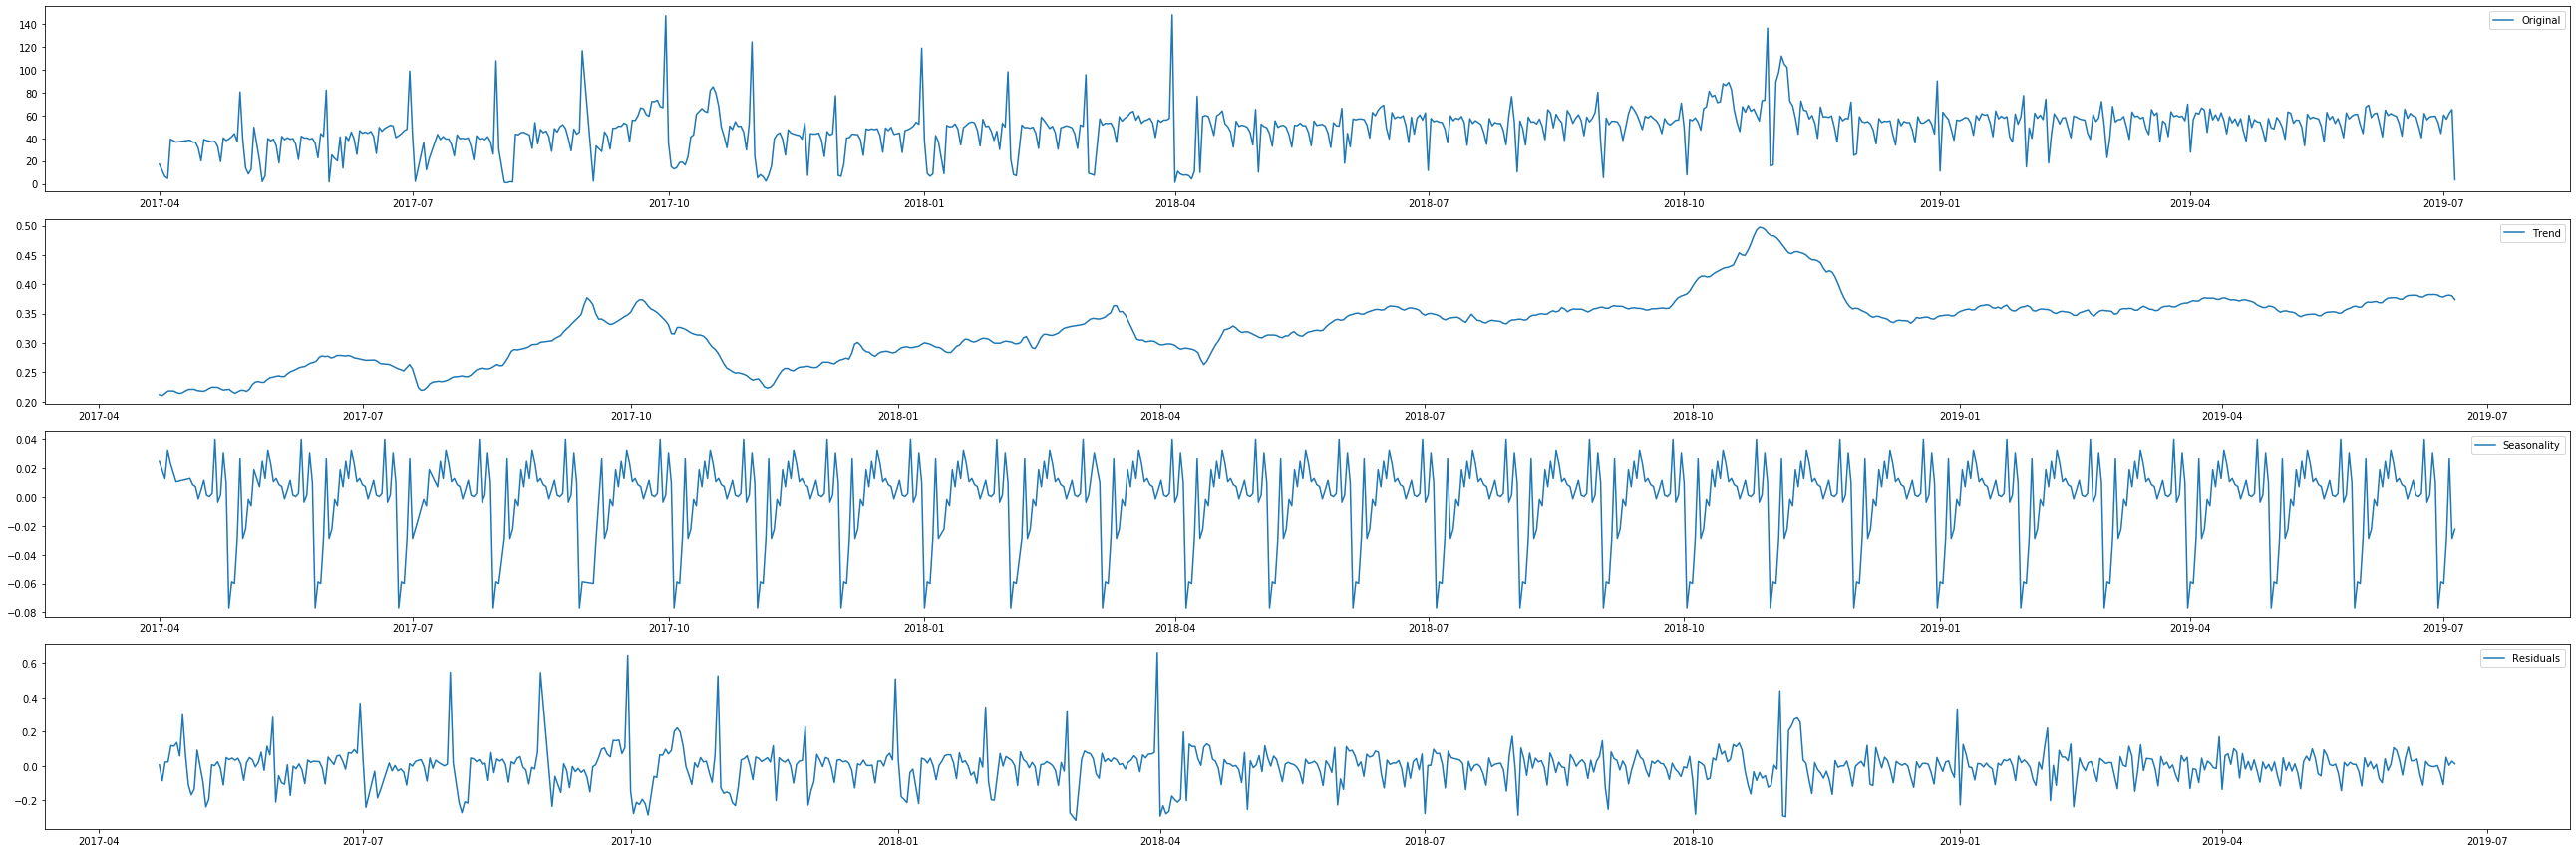

In [27]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_s1_sqrt, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_s1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_s1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_s1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [28]:
train_s1_decompose = residual_s1
train_s1_decompose.dropna(inplace=True)
test_stationarity(train_s1_decompose)

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_s2 = seasonal_decompose(train_s2_scaled, freq=30)
trend_s2 = decomposition_s2.trend
seasonal_s2 = decomposition_s2.seasonal
residual_s2 = decomposition_s2.resid

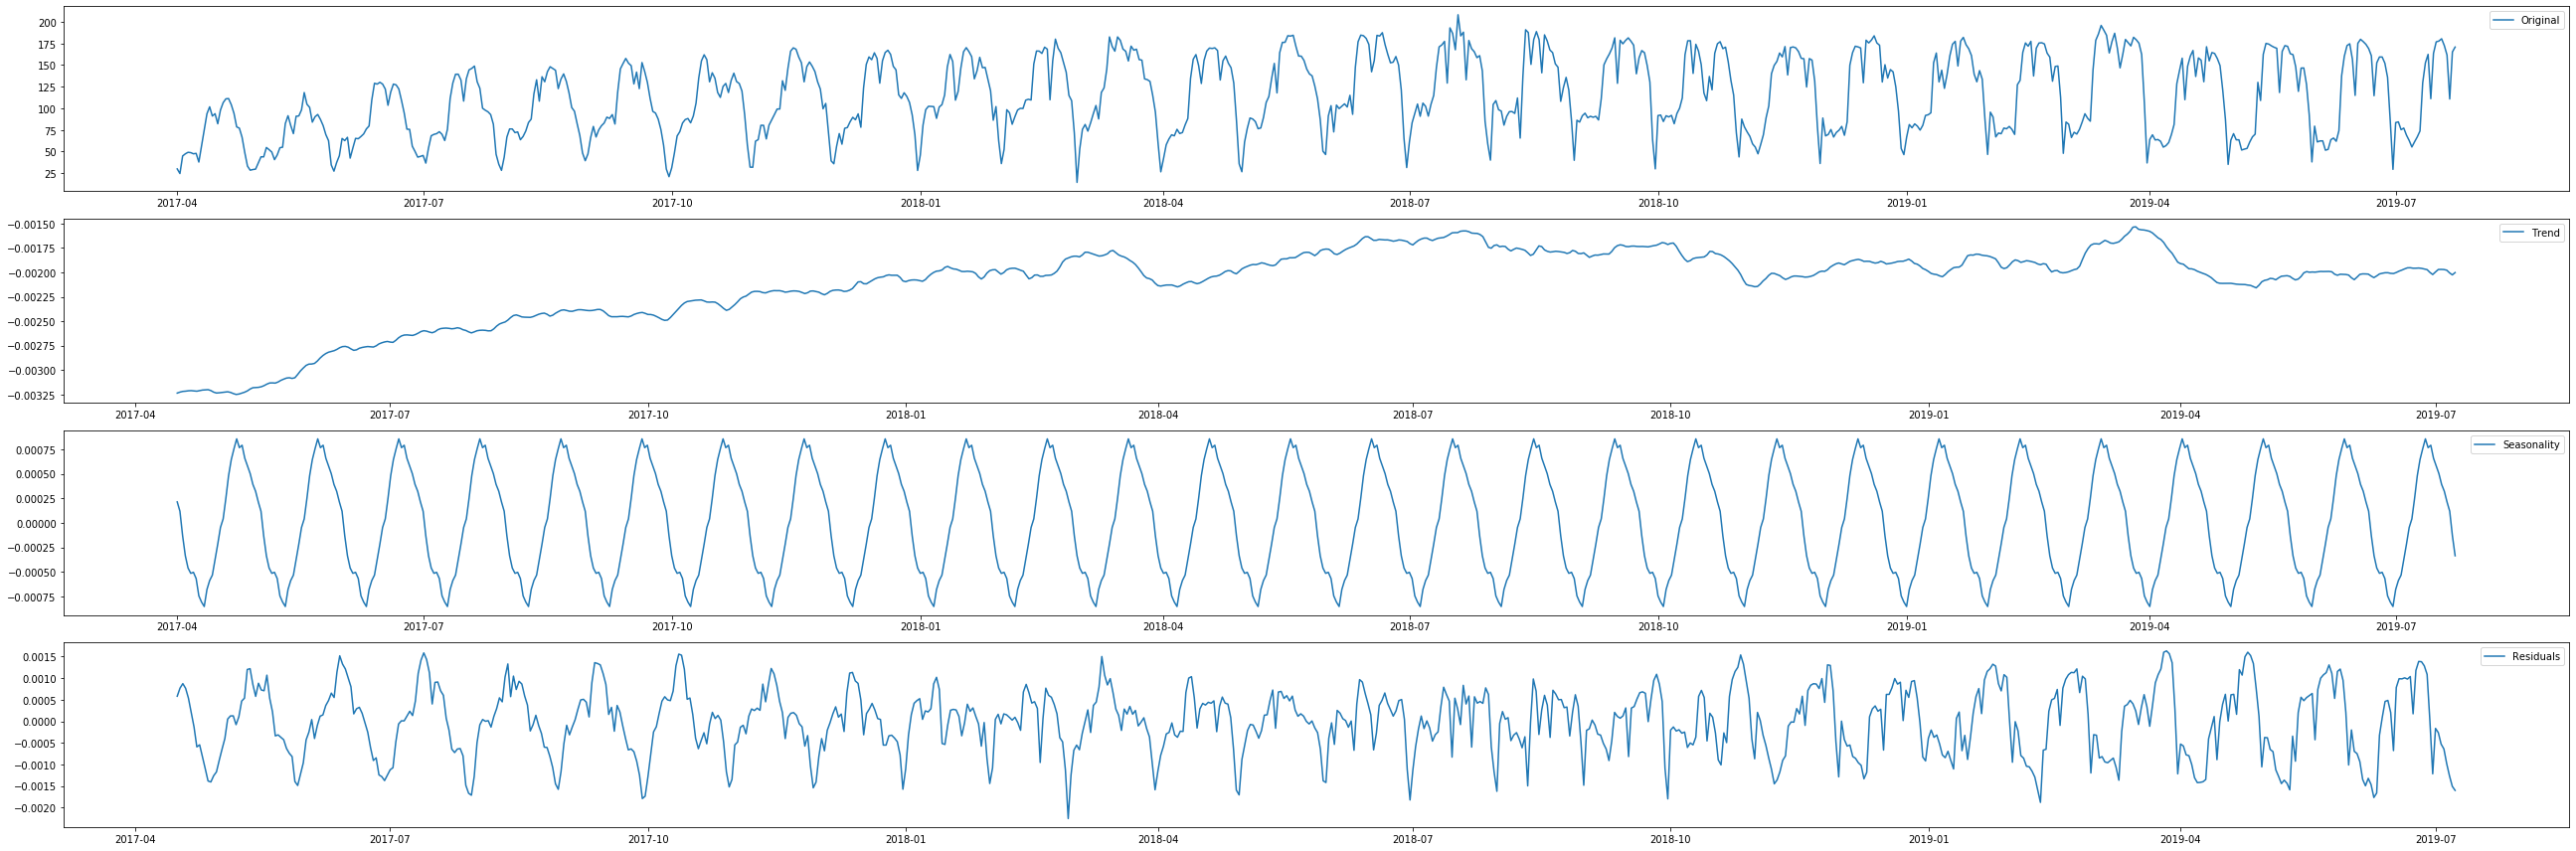

In [30]:
plt.figure(figsize=(36,12))
plt.subplot(411)
plt.plot(train_s2_sqrt, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_s2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_s2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_s2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [31]:
train_s2_decompose = residual_s2
train_s2_decompose.dropna(inplace=True)
#test_stationarity(train_s2_decompose)

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [33]:
lag_acf_s1 = acf(train_s1_scaled, nlags=20)
lag_pacf_s1 = pacf(train_s1_scaled, nlags=20, method='ols')

/Users/arijitchandra/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

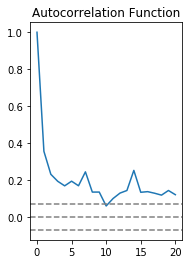

In [34]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_s1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

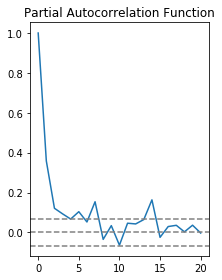

In [35]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_s1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [36]:
lag_acf_s2 = acf(train_s2_scaled, nlags=21)
lag_pacf_s2 = pacf(train_s2_scaled, nlags=21, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

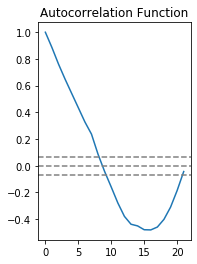

In [37]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_s2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

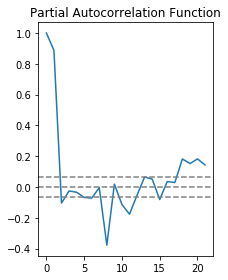

In [38]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_s2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_s2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_s2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#### AR Model
#model_s1 = ARIMA(train_s1_sqrt, order=(0, 1, 0))
#results_AR = model_s1.fit(disp=-1)
#plt.figure(figsize=(36,12))
#plt.plot(train_s1_sqrt_diff)
#plt.plot(results_AR.fittedvalues, color='red')
##plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_s1_sqrt_diff)**2))

In [ ]:
#from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_absolute_error
# 
# 
#trn, tst = train_s1_sqrt['2017':'2018'].values, train_s1_sqrt['2019'].values
#history = [x for x in trn]
#predictions = list()
#for t in range(len(tst)):
#    model_s1 = ARIMA(history, order=(0,1,0))
#    model_s1_fit = model_s1.fit(disp=0)
#    output = model_s1_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = tst[t]
#    history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))
#actual_s1 = pd.DataFrame(tst).apply(np.square)
#pred_s1 = pd.DataFrame(predictions).apply(np.square)
#mape_s1 = mean_absolute_error(actual_s1,pred_s1)
#print('Test MAE on Segment 1: %.3f' % mape_s1)
#
## plot
#pyplot.figure(figsize=(24,12))
#pyplot.plot(tst)
#pyplot.plot(predictions, color='red')
#pyplot.show()

In [ ]:
#from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_absolute_error
# 
# 
#trn_s2, tst_s2 = train_s2_sqrt['2017':'2018'].values, train_s2_sqrt['2019'].values
#history_s2 = [x for x in trn_s2]
#predictions_s2 = list()
#for t in range(len(tst_s2)):
#    model_s2 = ARIMA(history_s2, order=(0,1,0))
#    model_s2_fit = model_s2.fit(disp=0)
#    output = model_s2_fit.forecast()
#    yhat = output[0]
#    predictions_s2.append(yhat)
#    obs = tst_s2[t]
#    history_s2.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))
#actual_s2 = pd.DataFrame(tst_s2).apply(np.square)
#pred_s2 = pd.DataFrame(predictions_s2).apply(np.square)
#mape_s2 = mean_absolute_error(actual_s2,pred_s2)
#print('Test MAE on Segment 2: %.3f' % mape_s2)
## plot
#pyplot.figure(figsize=(24,12))
#pyplot.plot(tst_s2)
#pyplot.plot(predictions_s2, color='red')
#pyplot.show()

In [ ]:
#overall_mape=0.5*mape_s1 + 0.5*mape_s2
#print('Combined MAPE' , overall_mape)

In [ ]:
#from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_absolute_error
# 
#predictions_test_s1 = list()
#
#model_s1 = ARIMA(train_s1_sqrt.values, order=(0,1,0))
#model_s1_fit = model_s1.fit(disp=0)
##output_test_s1 = model_s1_fit.forecast()
#   # yhat = output_test_s1[0]
#   # predictions_test_s1.append(yhat)
#   # obs_test_s1 = test_s1_sqrt[t]
#   # history.append(obs_test_s1)
#   # print('predicted=%f, expected=%f' % (yhat, obs_test_s1))

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
import warnings
import itertools
warnings.filterwarnings("ignore")
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s1 = sm.tsa.statespace.SARIMAX(train_s1_scaled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results_s1 = mod_s1.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s1.aic))
        except:
            continue

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2256      0.022     10.227      0.000       0.182       0.269
ma.L1         -0.9668      0.007   -130.499      0.000      -0.981      -0.952
sigma2         0.0125      0.000     38.195      0.000       0.012       0.013


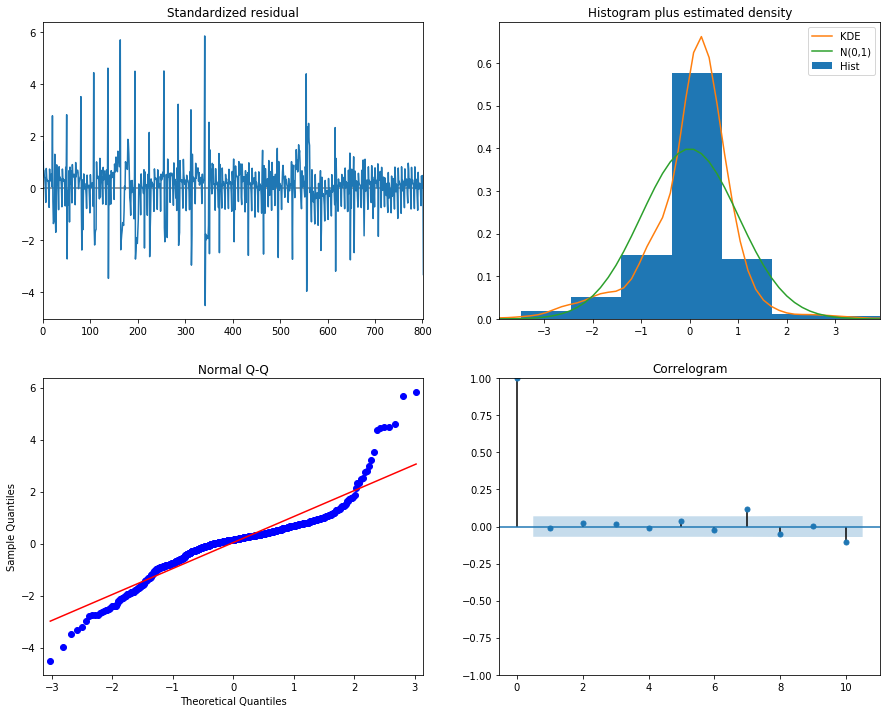

In [41]:
import statsmodels.api as sm
mod_s1 =sm.tsa.statespace.SARIMAX(train_s1_scaled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_s1 = mod_s1.fit()

print(results_s1.summary().tables[1])

results_s1.plot_diagnostics(figsize=(15, 12))
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2642      0.027      9.919      0.000       0.212       0.316
ma.L1         -0.9681      0.009   -107.056      0.000      -0.986      -0.950
sigma2         0.0144      0.000     31.993      0.000       0.014       0.015


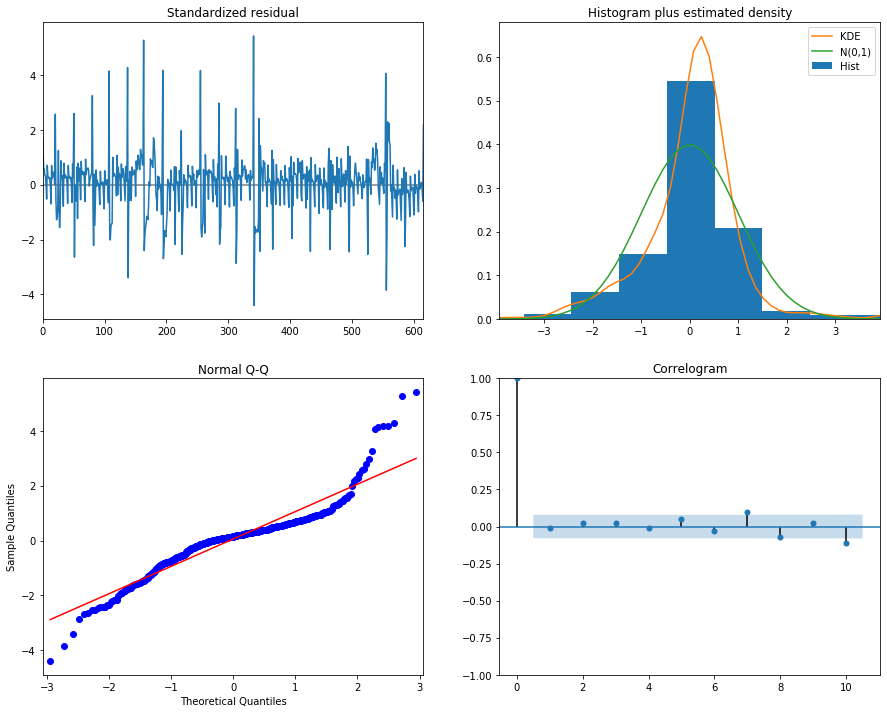

In [42]:
import statsmodels.api as sm
mod_val_s1 =sm.tsa.statespace.SARIMAX(train_s1_scaled['2017':'2018'],
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_val_s1 = mod_val_s1.fit()

print(results_val_s1.summary().tables[1])

results_val_s1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
#### Checking MAPE on data for segment 1
from sklearn.metrics import mean_absolute_error

pred_s1= results_val_s1.get_prediction(index=train_s1_scaled['2019'].index, start=1, end=len(train_s1_scaled['2019']))
pred_s1_values = pd.DataFrame(pred_s1.predicted_mean, index=train_s1_scaled['2019'].index)
pred_s1_values=scaler.inverse_transform(pred_s1_values)
pred_19 = pd.DataFrame(pred_s1_values, index=train_s1_scaled['2019'].index,
                       columns=train_s1_scaled['2019'].columns).apply(np.square)


pred_s1_trn = results_val_s1.get_prediction(index=train_s1_scaled['2017':'2018'].index,start=1,
                                         end=len(train_s1_scaled['2017':'2018']))
pred_s1_trn_values = pd.DataFrame(pred_s1_trn.predicted_mean, index=train_s1_scaled['2017':'2018'].index)
pred_s1_trn_values = scaler.inverse_transform(pred_s1_trn_values)
pred_17_18 = pd.DataFrame(pred_s1_trn_values, index=train_s1_scaled['2017':'2018'].index,
                          columns=train_s1_scaled['2017':'2018'].columns).apply(np.square)

mape_s1_trn = mean_absolute_percentage_error(train_s1['2017':'2018'].values, pred_17_18)
mape_s1 = mean_absolute_percentage_error(train_s1['2019'].values, pred_19)

print("MAPE on 2017 and 2018 segment 1 data :", mape_s1_trn)
print("MAPE on 2019 segment 1 data :", mape_s1)
pred_19

MAPE on 2017 and 2018 segment 1 data : 638.5789715395161
MAPE on 2019 segment 1 data : 183.56515777369947


,case_count
application_date,
2019-01-01,378.070898
2019-01-02,13.134108
2019-01-03,14.175659
2019-01-04,607.008321
2019-01-05,728.171720
...,...
2019-07-01,2665.296836
2019-07-02,3323.703939
2019-07-03,3523.421164


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_s2 = sm.tsa.statespace.SARIMAX(train_s2_scaled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results_s2 = mod_s2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_s2.aic))
        except:
            continue

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.382e-07   9.04e-09     26.358      0.000     2.2e-07    2.56e-07


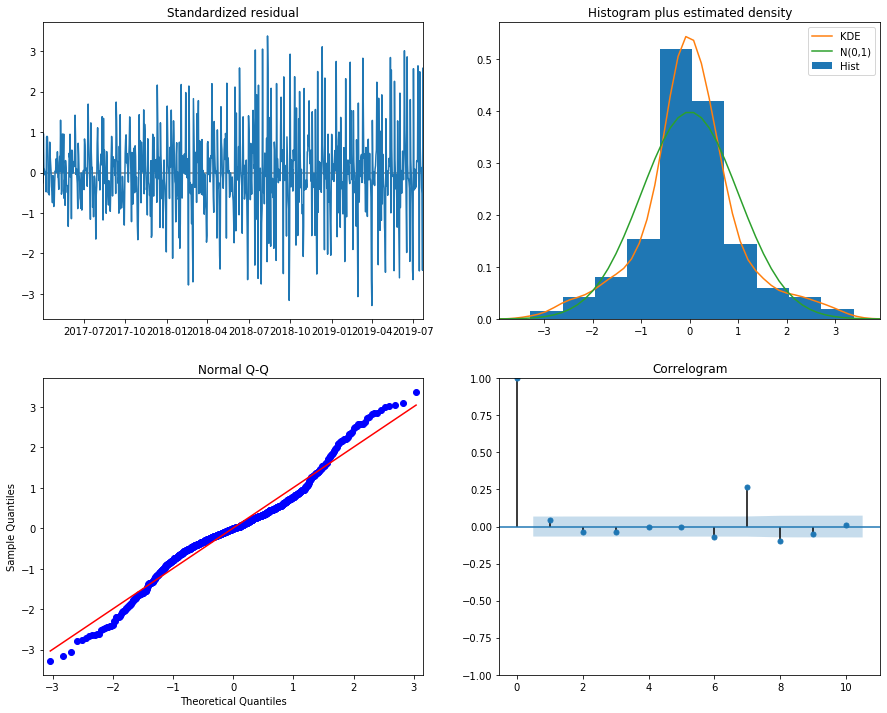

In [46]:
import statsmodels.api as sm
mod2_s2 =sm.tsa.statespace.SARIMAX(train_s2_scaled,
                                order=(0, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results_s2 = mod2_s2.fit()

print(results_s2.summary().tables[1])

results_s2.plot_diagnostics(figsize=(15, 12))
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.097e-07   9.11e-09     23.027      0.000    1.92e-07    2.28e-07


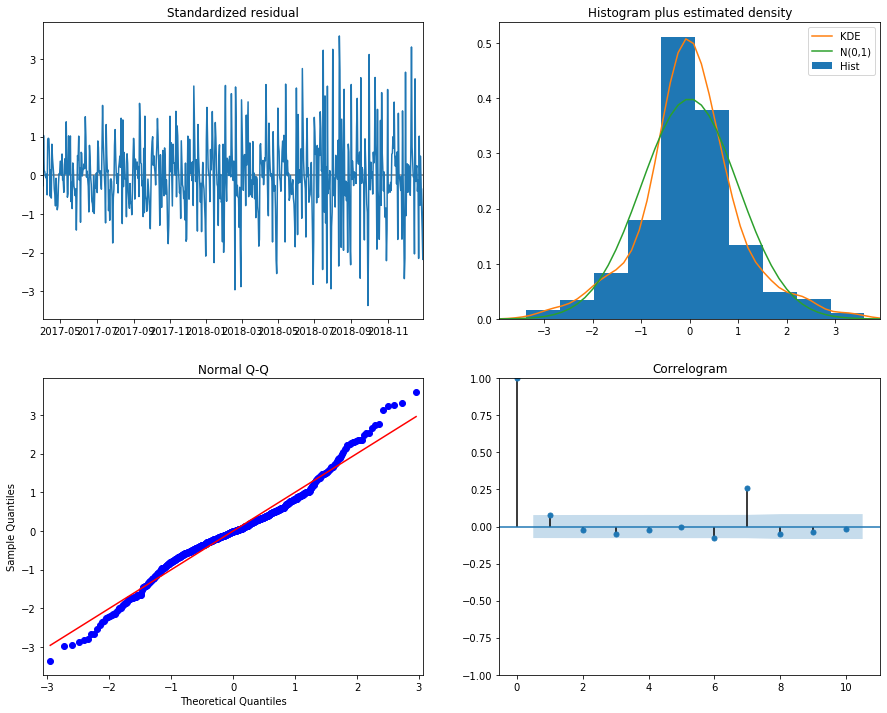

In [47]:
import statsmodels.api as sm
mod_s2_val =sm.tsa.statespace.SARIMAX(train_s2_scaled['2017':'2018'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results_s2_val = mod_s2_val.fit()

print(results_s2_val.summary().tables[1])

results_s2_val.plot_diagnostics(figsize=(15, 12))
plt.show()

In [48]:
#### Checking MAPE on data for segment 2
from sklearn.metrics import mean_absolute_error

pred_s2= results_s2_val.get_prediction(index=train_s2_scaled['2019'].index, start=1, end=len(train_s2_scaled['2019']))
pred_s2_values = pd.DataFrame(pred_s2.predicted_mean, index=train_s2_scaled['2019'].index)
pred_s2_values=scaler2.inverse_transform(pred_s2_values)
pred_s2_19 = pd.DataFrame(pred_s2_values, index=train_s2_scaled['2019'].index,
                       columns=train_s2_scaled['2019'].columns).apply(np.square)


pred_s2_trn = results_s2_val.get_prediction(index=train_s2_scaled['2017':'2018'].index,start=1,
                                         end=len(train_s2_scaled['2017':'2018']))
pred_s2_trn_values = pd.DataFrame(pred_s2_trn.predicted_mean, index=train_s2_scaled['2017':'2018'].index)
pred_s2_trn_values = scaler2.inverse_transform(pred_s2_trn_values)
pred_s2_17_18 = pd.DataFrame(pred_s2_trn_values, index=train_s2_scaled['2017':'2018'].index,
                          columns=train_s2_scaled['2017':'2018'].columns).apply(np.square)

mape_s2_trn = mean_absolute_percentage_error(train_s2['2017':'2018'].values, pred_s2_17_18)
mape_s2 = mean_absolute_percentage_error(train_s2['2019'].values, pred_s2_19)

print("MAPE on 2017 and 2018 segment 2 data :", mape_s2_trn)
print("MAPE on 2019 segment 2 data :", mape_s2)
pred_s2_17_18

MAPE on 2017 and 2018 segment 2 data : 3.456580743509951e-05
MAPE on 2019 segment 2 data : 55.25021328520127


,case_count
application_date,
2017-04-01,897.000000
2017-04-02,605.000000
2017-04-03,2016.445982
2017-04-04,2245.000000
2017-04-05,2415.000000
...,...
2018-12-27,20222.000000
2018-12-28,15611.000000
2018-12-29,9341.000000


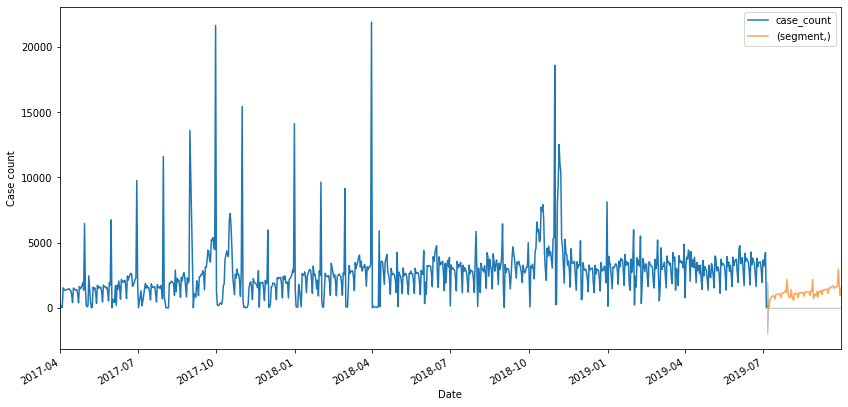

,segment
application_date,
2019-07-06,365.938592
2019-07-07,16.333946
2019-07-08,16.311381
2019-07-09,552.080758
2019-07-10,687.866412
...,...
2019-09-26,1689.452203
2019-09-27,2971.237292
2019-09-28,1716.660861


In [45]:
pred= results_s1.get_prediction(index=test_s1_scaled.index, start=1, end=len(test_s1_scaled))

pred_values=pd.DataFrame(pred.predicted_mean, index = test_s1_scaled.index)
pred_values=scaler.inverse_transform(pred_values)
pred_values=pd.DataFrame(pred_values, index = test_s1_scaled.index, columns=test_s1_scaled.columns).apply(np.square)
                         
pred_ci = pred.conf_int()

ax = train_s1.plot(label='observed')
pred_values.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Case count')
plt.legend()
plt.show()
pred_values

In [165]:
pred_ci.iloc[:, 1]

application_date
2019-07-06    1972.769028
2019-07-07       0.002061
2019-07-08       0.001821
2019-07-09       0.002607
2019-07-10       0.002754
                 ...     
2019-09-26       0.003599
2019-09-27       0.004614
2019-09-28       0.003881
2019-09-29       0.002968
2019-09-30       0.003262
Name: upper case_count, Length: 87, dtype: float64

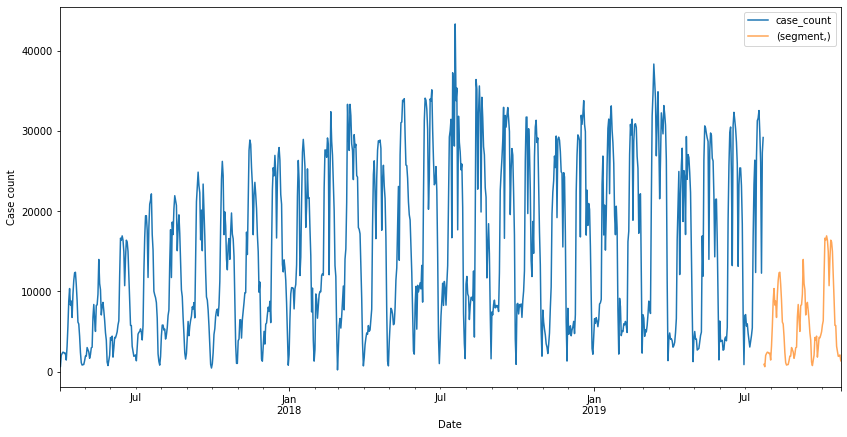

,lower case_count,upper case_count
application_date,,
2019-07-24,-0.005038,-0.003125
2019-07-25,-0.005162,-0.003249
2019-07-26,-0.004692,-0.002778
2019-07-27,-0.004634,-0.002721
2019-07-28,-0.004593,-0.002680
...,...,...
2019-10-20,-0.004569,-0.002656
2019-10-21,-0.004722,-0.002809
2019-10-22,-0.004703,-0.002789


In [151]:
pred2= results_s2.get_prediction(index=test_s2_scaled.index, start=1, end=len(test_s2_scaled))

pred2_values=pd.DataFrame(pred2.predicted_mean, index = test_s2_scaled.index)
pred2_values=scaler2.inverse_transform(pred2_values)
pred2_values=pd.DataFrame(pred2_values, index = test_s2_scaled.index, columns=test_s2_scaled.columns).apply(np.square)
                         
pred_ci = pred2.conf_int()
ax = train_s2.plot(label='observed')
pred2_values.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
#                scaler2.inverse_transform(pd.DataFrame(pred_ci.iloc[:,0]))**2,
#                scaler2.inverse_transform(pd.DataFrame(pred_ci.iloc[:,1]))**2,
#                color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Case count')
plt.legend()
plt.show()
#pred2_values
pred_ci

In [ ]:
pred_ts = np.concatenate((pred_values.values,pred2_values.values),axis=0)

In [ ]:
sub['case_count'] = pred_ts
sub.to_csv('pred_ts_scaled.csv', index=False)

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()